In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
legitimate = pd.read_csv('legitimate_copy.csv')

In [3]:
phishing  = pd.read_csv('phishing_copy.csv')

In [4]:
#Concatenating the dataframes into one 
final_data = pd.concat([legitimate, phishing]).reset_index(drop=True)
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']
urldata = pd.DataFrame(final_data, columns= feature_names)
urldata.head()


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,0,1,1,1,1,1,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,1,0


In [5]:
# Storing the data in CSV file
urldata.to_csv('final_data.csv', index=False)


In [6]:
data = pd.read_csv('final_data.csv') #complete_temp
data.head()


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,0,1,1,1,1,1,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,1,0


In [7]:
data.shape

(10000, 18)

In [8]:
data.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

In [1]:
# #Plotting the data distribution
# data.hist(bins = 30,figsize = (15,15))
# plt.show()


In [11]:
data['Domain']

0                                 graphicriver.net
1                                        ecnavi.jp
2                                     hubpages.com
3                                  extratorrent.cc
4                                    icicibank.com
                           ...                    
9995                     dg54asdg15g1.agilecrm.com
9996                                    osmaslo.ru
9997                firebasestorage.googleapis.com
9998    free-balance-tokenwallet.000webhostapp.com
9999                                     linktr.ee
Name: Domain, Length: 10000, dtype: object

In [12]:
data = data.drop( ['Domain'] , axis = 1).copy()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Have_IP        10000 non-null  int64
 1   Have_At        10000 non-null  int64
 2   URL_Length     10000 non-null  int64
 3   URL_Depth      10000 non-null  int64
 4   Redirection    10000 non-null  int64
 5   https_Domain   10000 non-null  int64
 6   TinyURL        10000 non-null  int64
 7   Prefix/Suffix  10000 non-null  int64
 8   DNS_Record     10000 non-null  int64
 9   Web_Traffic    10000 non-null  int64
 10  Domain_Age     10000 non-null  int64
 11  Domain_End     10000 non-null  int64
 12  iFrame         10000 non-null  int64
 13  Mouse_Over     10000 non-null  int64
 14  Right_Click    10000 non-null  int64
 15  Web_Forwards   10000 non-null  int64
 16  Label          10000 non-null  int64
dtypes: int64(17)
memory usage: 1.3 MB


In [14]:
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,0,0,1,1,1,1,1,0
4,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,1,0


In [15]:
data = data.sample(frac = 1).reset_index(drop=True)
data

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
2,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1
3,0,0,1,4,0,0,0,0,0,0,0,0,1,1,1,1,1
4,0,0,1,2,0,0,0,0,0,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1
9996,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
9997,0,0,1,2,0,0,0,1,0,0,1,1,1,1,1,1,1
9998,0,0,1,2,0,0,0,0,0,0,1,1,1,1,1,1,0


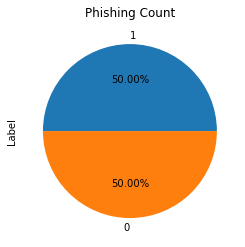

In [16]:
# Phishing Count in pie chart

data['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [17]:
y = data['Label']

In [18]:
X = data.drop('Label', axis = 1)

In [19]:
X.shape, y.shape

((10000, 16), (10000,))

In [20]:
#Splitting the data set into 80-20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #random_state = 12

X_train.shape, X_test.shape


((8000, 16), (2000, 16))

In [21]:
# from sklearn.metrics import accuracy_score
from sklearn import metrics 

In [120]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResult0(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [23]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=8)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [24]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)
# print(y_test)
# print(y_test_tree)

In [25]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.917
Decision Tree : Accuracy on test Data: 0.921

Decision Tree : f1_score on training Data: 0.912
Decision Tree : f1_score on test Data: 0.918

Decision Tree : Recall on training Data: 0.866
Decision Tree : Recall on test Data: 0.875

Decision Tree : precision on training Data: 0.964
Decision Tree : precision on test Data: 0.966


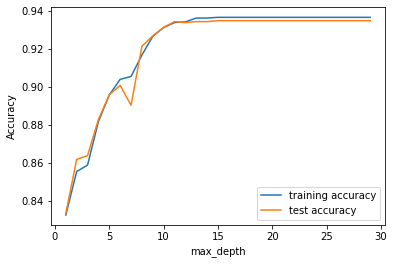

In [26]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();


In [27]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       996
           1       0.97      0.87      0.92      1004

    accuracy                           0.92      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000



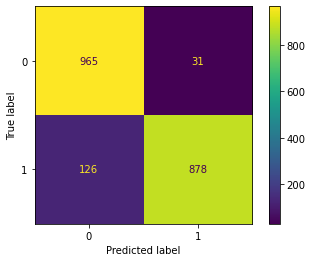

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_test_tree = tree.predict(X_test)
cm = confusion_matrix(y_test, y_test_tree)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [121]:
#storing the results. The below mentioned order of parameter passing is important.

storeResult0('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

In [30]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [32]:
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.919
K-Nearest Neighbors : Accuracy on test Data: 0.912

K-Nearest Neighbors : f1_score on training Data: 0.919
K-Nearest Neighbors : f1_score on test Data: 0.912

K-Nearest Neighborsn : Recall on training Data: 0.917
Logistic Regression : Recall on test Data: 0.913

K-Nearest Neighbors : precision on training Data: 0.921
K-Nearest Neighbors : precision on test Data: 0.912


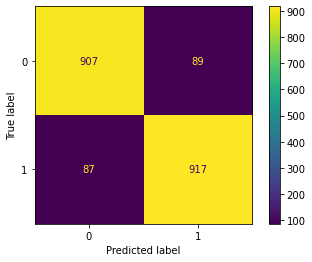

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_test_knn = knn.predict(X_test)
cm = confusion_matrix(y_test, y_test_knn)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [34]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       996
           1       0.91      0.91      0.91      1004

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



In [122]:
#storing the results. The below mentioned order of parameter passing is important.

storeResult0('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

In [36]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [37]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [38]:
acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.928
Support Vector Machine : Accuracy on test Data: 0.925

Support Vector Machine : f1_score on training Data: 0.925
Support Vector Machine : f1_score on test Data: 0.921

Support Vector Machine : Recall on training Data: 0.883
Support Vector Machine : Recall on test Data: 0.875

Support Vector Machine : precision on training Data: 0.971
Support Vector Machine : precision on test Data: 0.973


In [39]:
# training_accuracy = []
# test_accuracy = []
# # try max_depth from 1 to 30
# depth = range(1,30)
# for n in depth:
#     svm_test = GridSearchCV(SVC(), param_grid)

#     svm_test.fit(X_train, y_train)
#     # record training set accuracy
#     training_accuracy.append(tree_test.score(X_train, y_train))
#     # record generalization accuracy
#     test_accuracy.append(tree_test.score(X_test, y_test))
    

# #plotting the training & testing accuracy for max_depth from 1 to 30
# plt.plot(depth, training_accuracy, label="training accuracy")
# plt.plot(depth, test_accuracy, label="test accuracy")
# plt.ylabel("Accuracy")  
# plt.xlabel("max_depth")
# plt.legend();

In [40]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       996
           1       0.97      0.87      0.92      1004

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.92      2000
weighted avg       0.93      0.93      0.92      2000



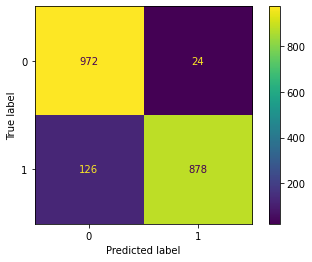

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_test_svc = svc.predict(X_test)
cm = confusion_matrix(y_test, y_test_svc)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [123]:
#storing the results. The below mentioned order of parameter passing is important.

storeResult0('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

In [43]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [44]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [45]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.868
Naive Bayes Classifier : Accuracy on test Data: 0.866

Naive Bayes Classifier : f1_score on training Data: 0.849
Naive Bayes Classifier : f1_score on test Data: 0.849

Naive Bayes Classifier : Recall on training Data: 0.745
Naive Bayes Classifier : Recall on test Data: 0.749

Naive Bayes Classifier : precision on training Data: 0.987
Naive Bayes Classifier : precision on test Data: 0.979


In [46]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_nb))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       996
           1       0.98      0.75      0.85      1004

    accuracy                           0.87      2000
   macro avg       0.89      0.87      0.86      2000
weighted avg       0.89      0.87      0.86      2000



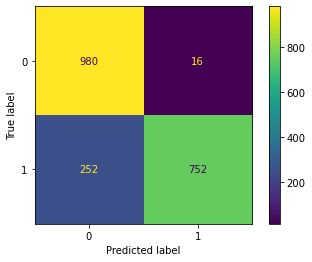

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_test_nb = nb.predict(X_test)
cm = confusion_matrix(y_test, y_test_nb)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [124]:
#storing the results. The below mentioned order of parameter passing is important.

storeResult0('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

In [78]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=4)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=4)

In [79]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)


In [80]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.936
Random Forest : Accuracy on test Data: 0.936

Random Forest : f1_score on training Data: 0.933
Random Forest : f1_score on test Data: 0.934

Random Forest : Recall on training Data: 0.893
Random Forest : Recall on test Data: 0.895

Random Forest : precision on training Data: 0.976
Random Forest : precision on test Data: 0.966


In [81]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       996
           1       0.98      0.90      0.93      1004

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



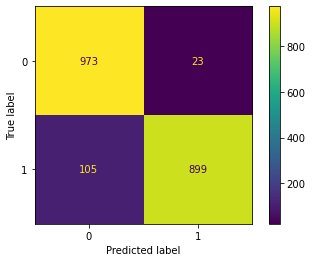

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_test_forest = forest.predict(X_test)
cm = confusion_matrix(y_test, y_test_forest)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [83]:
#storing the results. The below mentioned order of parameter passing is important.

storeResult1('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [96]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=5,learning_rate=0.8)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.8, max_depth=5)

In [97]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [98]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.937
Gradient Boosting Classifier : Accuracy on test Data: 0.935

Gradient Boosting Classifier : f1_score on training Data: 0.934
Gradient Boosting Classifier : f1_score on test Data: 0.933

Gradient Boosting Classifier : Recall on training Data: 0.894
Gradient Boosting Classifier : Recall on test Data: 0.895

Gradient Boosting Classifier : precision on training Data: 0.977
Gradient Boosting Classifier : precision on test Data: 0.974


In [99]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       996
           1       0.97      0.90      0.93      1004

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



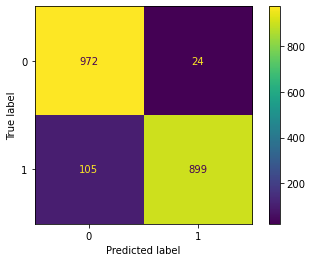

In [100]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_test_gbc = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_test_gbc)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [125]:
#storing the results. The below mentioned order of parameter passing is important.

storeResult0('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [102]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [103]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [104]:

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.932
Multi-layer Perceptron : Accuracy on test Data: 0.923

Multi-layer Perceptron : f1_score on training Data: 0.931
Multi-layer Perceptron : f1_score on test Data: 0.931

Multi-layer Perceptron : Recall on training Data: 0.919
Multi-layer Perceptron : Recall on test Data: 0.913

Multi-layer Perceptron : precision on training Data: 0.943
Multi-layer Perceptron : precision on test Data: 0.933


In [105]:
print(metrics.classification_report(y_test, y_test_mlp))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       996
           1       0.93      0.91      0.92      1004

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



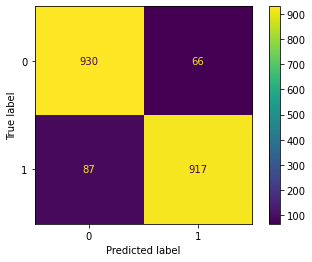

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_test_mlp = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_test_mlp)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [61]:
#storing the results. The below mentioned order of parameter passing is important.

storeResult1('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

In [110]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=6)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [111]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [112]:
#computing the accuracy of the model performance
acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost : f1_score on test Data: {:.3f}".format(f1_score_train_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost : Recall on test Data: {:.3f}".format(recall_score_test_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost : precision on test Data: {:.3f}".format(precision_score_test_xgb))

XGBoost: Accuracy on training Data: 0.937
XGBoost : Accuracy on test Data: 0.936

XGBoost : f1_score on training Data: 0.934
XGBoost : f1_score on test Data: 0.934

XGBoost : Recall on training Data: 0.894
XGBoost : Recall on test Data: 0.895

XGBoost : precision on training Data: 0.977
XGBoost : precision on test Data: 0.975


In [113]:
print(metrics.classification_report(y_test, y_test_xgb))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       996
           1       0.98      0.90      0.93      1004

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



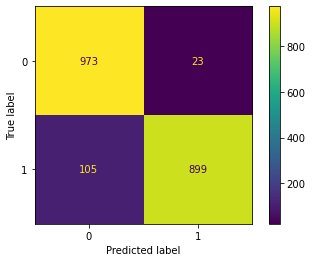

In [114]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_test_xgb = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_test_xgb)

cm_display = ConfusionMatrixDisplay(cm).plot()

<AxesSubplot:>

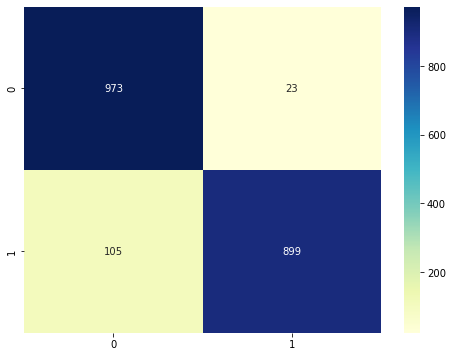

In [133]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [126]:
#storing the results. The below mentioned order of parameter passing is important.

storeResult0('XGBoost',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

In [127]:

#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [128]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Decision Tree,0.922,0.918,0.866,0.964
1,K-Nearest Neighbors,0.912,0.912,0.917,0.921
2,Support Vector Machine,0.925,0.921,0.883,0.971
3,Naive Bayes Classifier,0.866,0.849,0.745,0.987
4,Gradient Boosting Classifier,0.936,0.933,0.894,0.977
5,XGBoost,0.936,0.934,0.894,0.977


In [129]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy','f1_score'],ascending=False).reset_index(drop=True)

In [130]:
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,XGBoost,0.936,0.934,0.894,0.977
1,Gradient Boosting Classifier,0.936,0.933,0.894,0.977
2,Support Vector Machine,0.925,0.921,0.883,0.971
3,Decision Tree,0.922,0.918,0.866,0.964
4,K-Nearest Neighbors,0.912,0.912,0.917,0.921
5,Naive Bayes Classifier,0.866,0.849,0.745,0.987


In [70]:
save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier", "wb"))

In [71]:
load model from file
loaded_model = pickle.load(open("XGBoostClassifier", "rb"))
loaded_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)